Macarena Benjamin

## **Introduccion Dataset**

El problema de clasificación binaria a resolver que presenta este conjunto de datos se enfoca en predecir el abandono (variable target: **Churn**). El dataset Telco Customer Churn está diseñado para predecir el comportamiento de los clientes y ayudar a desarrollar programas enfocados en la retención. Cada fila del conjunto de datos representa un cliente, mientras que las columnas contienen información detallada sobre sus características. Incluye datos sobre si el cliente ha abandonado el servicio en el último mes, los servicios a los que se ha suscrito, como teléfono, múltiples líneas, internet, seguridad en línea, protección de dispositivos, soporte técnico y servicios de streaming. Además, se proporciona información sobre la cuenta del cliente, como la duración de su contrato, el método de pago utilizado, si opta por la facturación sin papel, los cargos mensuales y los cargos totales acumulados. También se incluyen datos demográficos, como el género, el rango de edad, y si el cliente tiene pareja o dependientes. Todo esto permite analizar los patrones de comportamiento de los clientes y desarrollar estrategias que ayuden a predecir el churn.

## **Extraccion de datos**

Los datos se extraen de la pagina de Kaggle https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

Se importa el archivo a traves de la conexion de la API de Kaggle


In [ ]:
#Se instala Kaggle
!pip install kaggle

In [ ]:
#Link de API de Kaggle a descargar
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 23.5MB/s]


In [ ]:
#Descomprimir zip
!unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
#Extraer set de datos
import pandas as pd
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Se verifica que la dimension del set de datos contenga mas de 1000 filas
df.shape

(7043, 21)

In [ ]:
#Se verfican los tipos de datos del dataset
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#Se verifica el desbalanceo de clases
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


## **Limpieza de datos**

In [ ]:
#Se elimina la columna customerID ya que no aporta informacion relevante para el analisis
df = df.drop('customerID', axis=1)

In [ ]:
#Se verifica
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Convertir 1 en "Yes" y 0 en "No" a la variable SeniorCitizen para convertirla en categorica
df['SeniorCitizen'] = df['SeniorCitizen'].replace({ 1: 'Yes', 0: 'No'})

#Convertir TotalCharges a variable numerica
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Convertir "Yes" en 1 y "No" en 0 en la columna Churn (target) para convertirla en numerica
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

<ipython-input-24-c856aa7f3a1d>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [ ]:
#Se verifica
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
#Se verifica si tiene datos nulos
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#Se eliminan registros nulos
df = df.dropna()

In [ ]:
#Se verifican nulos
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#Se verfican los tipos de datos del dataset luego de la limpieza de datos
df.dtypes

,0
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


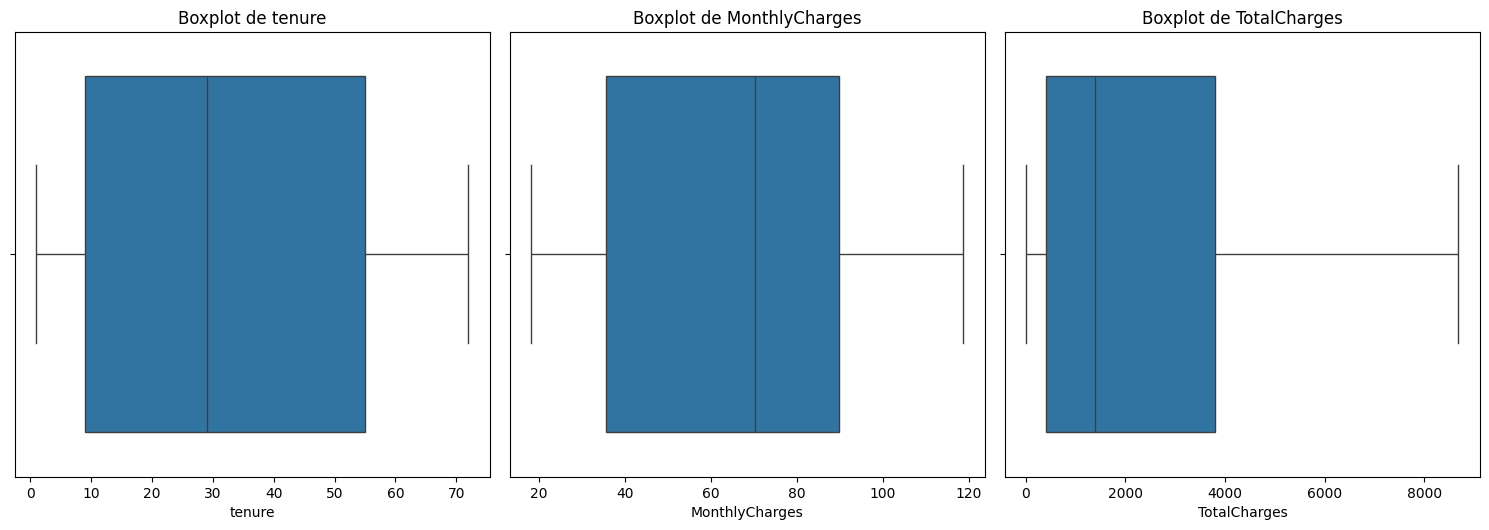

In [ ]:
#Se verifica si hay outliers
import matplotlib.pyplot as plt
import seaborn as sns

#Seleccionar solo las columnas numericas del DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

#Excluir la columna 'Churn' que es la variable target
numeric_columns = numeric_columns.drop('Churn')

#Crear un boxplot para cada columna numerica restante
plt.figure(figsize=(15, 10))

#Loop a traves de cada columna numerica y crear un boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3 columnas por fila
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.tight_layout()  #Ajusta el espacio entre gráficos

plt.show()

No se encuentran valores anomalos significativos

In [ ]:
#Se verifica las dimensiones del nuevo dataset
df.shape

(7032, 20)

In [ ]:
#Se verifica el desbalanceo de clases
print(df['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


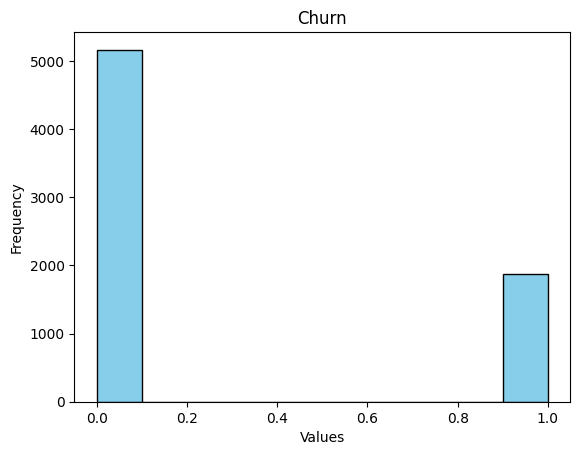

In [ ]:
#Se verifica que las clases estan desbalanceadas
#Se grafican las clases
import matplotlib.pyplot as plt
import numpy as np

#Grafico
plt.hist(df['Churn'], color='skyblue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Churn')


plt.show()

## **Preparacion del set de datos**

In [ ]:
#Se aplica dummies a las variables categoricas
data = pd.get_dummies(df, dtype=int)
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
#Se normalizan los datos
data = (data - data.min()) / (data.max() - data.min())
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#Convertir a float32 para usar GPU
data = data.astype(np.float32)

In [ ]:
#Se verifica el tipo de datos
data.dtypes

,0
tenure,float32
MonthlyCharges,float32
TotalCharges,float32
Churn,float32
gender_Female,float32
gender_Male,float32
SeniorCitizen_No,float32
SeniorCitizen_Yes,float32
Partner_No,float32
Partner_Yes,float32


In [ ]:
#Se verifica dimesion del dataset
data.shape

(7032, 47)

In [ ]:
#Se verifica el desbalanceo de clases
print(data['Churn'].value_counts())

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


In [ ]:
#Se separan en subconjutos X e y
X = data.drop("Churn", axis=1)
y = data[["Churn"]]

In [ ]:
import pandas as pd

#Se guardan los datos en el drive

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/churn_data.csv'

data.to_csv(file_path, index=False)

Mounted at /content/drive


# **Random Forest**

## **Con desbalanceo**

In [ ]:
#Se importan librerias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Se aplica un modelo de Random Forest

def f1_precision_recall(X, y):
    #Se selecciona 50% para entrenamiento y 50% para testeo con semilla fijada en 2024
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, stratify=y, random_state=2024)

    #Clasificador a Random Forest
    clf = RandomForestClassifier(random_state=2024)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #Calculo de metricas
    print("f1_score:", metrics.f1_score(y_test, y_pred))
    print("precision:", metrics.precision_score(y_test, y_pred))
    print("recall:", metrics.recall_score(y_test, y_pred))

f1_precision_recall(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


f1_score: 0.543859649122807
precision: 0.6555891238670695
recall: 0.46466809421841543


## **Con SMOTE**

In [ ]:
#Se balancean las clases usando SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import imblearn

In [ ]:
#Aplicar SMOTE al conjunto completo de datos
smote = imblearn.over_sampling.SMOTE(random_state=2024)
X_smote, y_smote = smote.fit_resample(X, y)

#Verificar distribucion de clases despues de SMOTE
print(f"Distribución de clases después de SMOTE: {y_smote.value_counts()}")

Distribución de clases después de SMOTE: Churn
0.0      5163
1.0      5163
Name: count, dtype: int64


In [ ]:
#Se calculan las metricas
f1_precision_recall(X_smote, y_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


f1_score: 0.8442367601246106
precision: 0.8485322896281801
recall: 0.839984502130957


## **con Generacion de Datos red GAN**

In [ ]:
#Se trae el dataframe que se guarda desde el google drive asi no es necesario correr todo el colab previo
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/churn_data.csv'

# Leer el archivo CSV en un DataFrame
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
data.head()

Mounted at /content/drive


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#Se verifica la distribucion de clases para ver cuantos nuevos registros sinteticos se tienen que crear
print(data['Churn'].value_counts())

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


Para poder balancear este dataframe con GAN voy a tener que crear 3.294 nuevos registros sinteticos

### **Generador**

In [ ]:
!pip install keras-tuner

In [ ]:
#Se importan librerias
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import time
import IPython

from tqdm import tqdm
from tqdm.auto import trange

In [ ]:
DIM_RUIDO = 100 #Es un hiperparámetro

modelo_generador = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[DIM_RUIDO]),
	  keras.layers.Dense(512, activation="sigmoid"),
    keras.layers.Dense(data.shape[1], activation="sigmoid")  #Capa de salida con sigmoide
])

modelo_generador.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │          51,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 47)                  │          24,111 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,823 (296.18 KB)

 Trainable params: 75,823 (296.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Se prueba el modelo_generador

#Se genera ruido al azar
ruido = tf.random.normal((1, DIM_RUIDO))

#Se genera un registro a partir del ruido
fila_generada = modelo_generador(ruido, training=False)

fila_generada

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[0.49248725, 0.6718809 , 0.14966124, 0.56469303, 0.4023947 ,
        0.18641639, 0.38208768, 0.5311062 , 0.72081745, 0.54467785,
        0.4851131 , 0.39711124, 0.5036171 , 0.49504903, 0.4855972 ,
        0.54546434, 0.58925456, 0.41143745, 0.6668446 , 0.36282742,
        0.72882533, 0.8071139 , 0.788131  , 0.6145571 , 0.38872644,
        0.76696384, 0.8075363 , 0.3486072 , 0.48810035, 0.23934245,
        0.3341296 , 0.7703695 , 0.65215456, 0.5500616 , 0.51523274,
        0.680351  , 0.83984196, 0.49043682, 0.33740142, 0.5156014 ,
        0.4979653 , 0.6699478 , 0.5530495 , 0.48631856, 0.45225528,
        0.36560985, 0.68775463]], dtype=float32)>

### **Discriminador**

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelo_discriminador = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[data.shape[1]]),  # Entra una fila de cada una de las columnas
	  keras.layers.Dense(512, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])

opt = RMSprop(learning_rate=0.00005)
modelo_discriminador.compile(loss="binary_crossentropy", optimizer=opt)

modelo_discriminador.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,089 (98.00 KB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Se analiza cómo discrimina el registro generado anteriormente
#Un valor cercano a 0.5 significa que no puede saber si es 0 o 1
modelo_discriminador(fila_generada)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5367797]], dtype=float32)>

### **Modelo adversario**

In [ ]:
#Se entrenar al discrinador a mano
modelo_discriminador.trainable = False

modelo_gan = keras.models.Sequential([
    modelo_generador,
    modelo_discriminador
])

opt = RMSprop(learning_rate=0.00005)
modelo_gan.compile(loss="binary_crossentropy", optimizer=opt)

#### **Entrenamiento del modelo adversario**

In [ ]:
#Entrenamos el generador y el discriminador
EPOCHS = 10
BATCH_SIZE = 256

# para cada epoca...
for epoch in trange(EPOCHS, desc="epoch"):
    # para cada batch...
    with trange(data.shape[0] // BATCH_SIZE, desc="batch", leave=False) as t_batch:
        for n_batch in t_batch:
            ## Entrenamiento del modelo discriminador

            # seleccionamos BATCH_SIZE // 2 imágenes reales
            X_real = data.values[np.random.randint(0, data.shape[0], BATCH_SIZE // 2)]
            # creamos etiquetas para las imágenes reales (todas 1)
            y_real = np.ones((BATCH_SIZE // 2, 1)) * 0.9  # 0.9 --> label smoothing

            # generamos BATCH_SIZE // 2 imágenes ficticias con el generador
            X_fake = modelo_generador(np.random.randn(DIM_RUIDO * BATCH_SIZE // 2).reshape(BATCH_SIZE // 2, DIM_RUIDO))
            # creamos etiquetas para las imágenes ficticias (todas 0)
            y_fake = np.zeros((BATCH_SIZE // 2, 1))  # podríamos probar con 0.1 --> label smoothing

            # creamos un conjunto de entrenamiento para el discriminador
            X_train = np.concatenate((X_real, X_fake))
            y_train = np.concatenate((y_real, y_fake))

            # actualizamos a mano los pesos del modelo discriminador
            discriminador_loss = modelo_discriminador.train_on_batch(X_train, y_train)

            ## Entrenamiento del modelo GAN (en realidad el generador)

            # Generamos un lote de ruido
            X_gan = np.random.randn(DIM_RUIDO * BATCH_SIZE).reshape(BATCH_SIZE, DIM_RUIDO)

            # Creamos etiquetas invertidas para los ejemplos ficticios (todas 1)
            y_gan = np.ones((BATCH_SIZE, 1))

            # Actualizamos el generador usando el error del discriminador (el discriminador no se entrena)
            gan_loss = modelo_gan.train_on_batch(X_gan, y_gan)

            # Información sobre las pérdidas de este lote
            # Convertimos las pérdidas a escalares
            discriminador_loss_value = discriminador_loss.item()  # Para el discriminador
            gan_loss_value = gan_loss[0].item()  # Para el generador, accediendo al primer elemento de la lista

            # Actualizamos el progreso con las pérdidas
            t_batch.set_postfix(discriminador_loss=f"{discriminador_loss_value:.3f}", gan_loss=f"{gan_loss_value:.3f}")

# mostramos las funciones de pérdida finales
print(discriminador_loss_value, gan_loss_value)

# generamos registros ficticios con el generador
X_fake = modelo_generador(np.random.randn(DIM_RUIDO * 10).reshape(10, DIM_RUIDO))
print(X_fake)


epoch:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

batch:   0%|          | 0/27 [00:00<?, ?it/s]

0.7650268077850342 0.7650268077850342
tf.Tensor(
[[0.05769252 0.17751716 0.8413382  0.8892837  0.05628897 0.07513448
  0.10594928 0.9293107  0.08107064 0.16102877 0.87636435 0.90281135
  0.9399979  0.9390332  0.06098291 0.5307395  0.95200086 0.04054891
  0.06050619 0.9596857  0.95874614 0.08923785 0.8901176  0.9690554
  0.68210095 0.96085256 0.17915426 0.93125683 0.16242178 0.22798042
  0.863633   0.17461623 0.24997628 0.9077195  0.04249115 0.70445514
  0.95908993 0.93679    0.93196857 0.9315914  0.0972051  0.9386083
  0.8242585  0.9431749  0.9076205  0.03995951 0.93732786]
 [0.04124939 0.18446614 0.83761287 0.84622866 0.03485314 0.06849479
  0.15316762 0.9522329  0.08030838 0.13852438 0.88870424 0.92831016
  0.96495783 0.9287519  0.05372915 0.334868   0.9576406  0.05618908
  0.09715683 0.93111783 0.96023476 0.08689282 0.8500775  0.9728256
  0.6222498  0.9645639  0.14103955 0.9332695  0.16014269 0.22176863
  0.85337275 0.2095041  0.29636693 0.8947868  0.06223586 0.6407163
  0.96654844 

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

# Cantidad de registros de necesarios para balancear
count_Churn_1 = 1869
count_Churn_0 = 5163

# Calcular la cantidad de ejemplos adicionales necesarios para equilibrar las clases
samples_needed = count_Churn_0 - count_Churn_1

# Tamaño de lote fijo para generar muestras
batch_size = samples_needed * 5  # Genera un lote 5 veces mayor a lo necesario

# Lista para almacenar los registros generados que cumplan el criterio
X_fake_filtrado = []

# Función para generar muestras balanceadas
def generar_muestras_balanceadas(batch_size, samples_needed):
    while len(X_fake_filtrado) < samples_needed:
        # Generar un lote de muestras
        X_fake = modelo_generador(np.random.randn(DIM_RUIDO * batch_size).reshape(batch_size, DIM_RUIDO))

        # Convertir el tensor a NumPy
        X_fake_numpy = X_fake.numpy()

        # Clasificar en 1 o 0 según la columna 'Churn' (columna 4 -- índice 3)
        X_fake_numpy[:, 3] = np.where(X_fake_numpy[:, 3] > 0.5, 1, 0)

        # Filtrar registros con Churn = 1 y añadirlos a la lista
        X_fake_filtrado.extend(X_fake_numpy[X_fake_numpy[:, 3] == 1])

    # Devolver solo las muestras necesarias
    return np.array(X_fake_filtrado[:samples_needed])

# Generar las muestras balanceadas
X_fake_final = generar_muestras_balanceadas(batch_size, samples_needed)

# Crear el DataFrame con los registros sintéticos
df_sintetico = pd.DataFrame(X_fake_final, columns=data.columns)

# Concatenar los datos originales con los registros generados
df_balanceado = pd.concat([data, df_sintetico], ignore_index=True)

# Verificar el balance final de la clase Churn
print(df_balanceado['Churn'].value_counts())


Churn
0.0    5163
1.0    5163
Name: count, dtype: int64


In [ ]:
#Se separan en subconjutos X e y
X = df_balanceado[df_balanceado.columns.drop("Churn")]
y = df_balanceado["Churn"]

### **Random Forest**

In [ ]:
#Se aplica Random Forest
#Se importan librerias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Se aplica un modelo de Random Forest

def f1_precision_recall(X, y):
    #Se selecciona 50% para entrenamiento y 50% para testeo con semilla fijada en 2024
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, stratify=y, random_state=2024)

    #Clasificador a Random Forest
    clf = RandomForestClassifier(random_state=2024)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #Calculo de metricas
    print("f1_score:", metrics.f1_score(y_test, y_pred))
    print("precision:", metrics.precision_score(y_test, y_pred))
    print("recall:", metrics.recall_score(y_test, y_pred))

f1_precision_recall(X, y)

f1_score: 0.8472906403940886
precision: 0.9009166302924487
recall: 0.7996900426191399


# **Informe**

https://docs.google.com/document/d/1xaFzON2y2X66f9oM8a1-5KtTG7zpTNNj-1ltZgHoxWo/edit?usp=sharing